# Machine learning exercise 5-6

1. Classification algorithms
   - k-Nearest Neigbours
   - Logistic regression
   - Naive Bayes
2. Decision Tree methods
   - Decision tree
   - Random forest
3. Application of the classifiers
   - With artificial data
   - Real data


In [1]:
path = "../Data/"

In [2]:
import pandas as pd

class Data:
    """ Util class to store training and test datasets. """
    def __init__(self, train_explanatory: pd.DataFrame, train_explained: pd.DataFrame,
                test_explanatory: pd.DataFrame, test_explained: pd.DataFrame):
        self.train_explanatory = train_explanatory
        self.train_explained = train_explained
        self.test_explanatory = test_explanatory
        self.test_explained = test_explained

    def consistency_check(self):
        print("Shape EXPLANATORY (Training set): {}".format(self.train_explanatory.shape))
        print("Shape EXPLAINED (Training set): {}".format(self.train_explained.shape))
        print("Shape EXPLANATORY (Test set): {}".format(self.test_explanatory.shape))
        print("Shape EXPLAINED (Test set): {}".format(self.test_explained.shape))

        if self.train_explanatory.shape[0] == self.train_explained.shape[0] and \
            self.test_explained.shape[0] == self.test_explained.shape[0] and \
            self.train_explanatory.shape[1] == self.test_explanatory.shape[1] :
            print("Consistent dimensions")

        else:
            print("ERROR: Inconsistent dimensions!")
            print(self.train_explanatory.shape[0] == self.train_explained.shape[0])
            print(self.test_explanatory.shape[0] == self.test_explained.shape[0])
            print(self.train_explanatory.shape[1] == self.test_explanatory.shape[1])
            return False 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
 2   Class   100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
          X         Y  Class
0 -0.876847  1.996319     -1
1 -0.748759  1.997249     -1
2 -0.635575  1.978047     -1
3 -0.513769  1.973225     -1
4 -0.382578  1.955077     -1


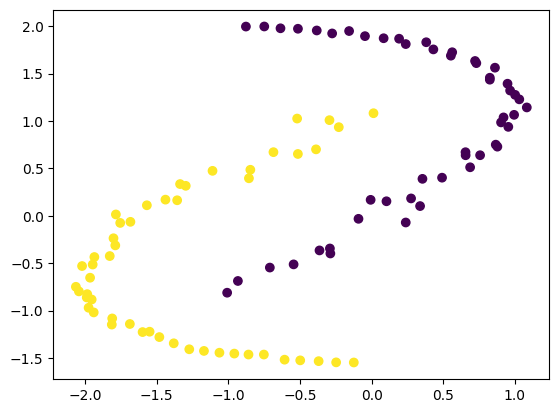

In [3]:
import numpy as np
import math

yinyang = pd.read_csv(path+"YinYang.csv")
yinyang.info()
print(yinyang.head())

import matplotlib.pyplot as plt

plt.scatter(yinyang["X"], yinyang["Y"], c = yinyang["Class"])
plt.show()

- train subset - used for fitting/training classifiers
- test subseds - used for validating the fitted classifiers

Threshold: 75
Shape EXPLANATORY (Training set): (75, 2)
Shape EXPLAINED (Training set): (75,)
Shape EXPLANATORY (Test set): (25, 2)
Shape EXPLAINED (Test set): (25,)
Consistent dimensions


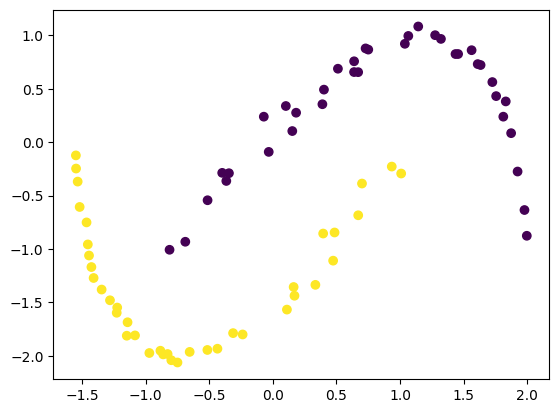

In [4]:
yinyang = yinyang.sample(frac=1).reset_index(drop=True)
n = yinyang.shape[0]
threshold = math.floor(0.75*n)

X = yinyang.iloc[0:threshold:, :-1] # explained variables
Y = yinyang.iloc[0:threshold:, -1] # target variable

X_test = yinyang.iloc[threshold:n:, :-1]
Y_test = yinyang.iloc[threshold:n:, -1]

yy = Data(X,Y,X_test, Y_test)

print("Threshold: " + str(threshold))
yy.consistency_check()  

plt.scatter(yy.train_explanatory.iloc[:, 1], yy.train_explanatory.iloc[:, 0], c = yy.train_explained)
plt.show()

# 1.Classification algorithms
   - k-Nearest Neigbours
   - Logistic regression
   - Naive Bayes 

## k-Nearest Neighbours (kNNr)
- simple and non parametric
- no prior assumptions
- lazy learning algorithm, no "real" training, only needs to load the data
- slow on large datasets: needs to calculate distance between new point and each existing point
- can be bad in categorical data: distance between categorical points is not a well-defined quantity
- imbalanced data and high dimensions can cause problems

In [5]:
from sklearn.neighbors import KNeighborsClassifier

k=1

def custom_hardcoded_metric(x1,x2):
    return abs(x1[0] - x2[0]) + abs(x1[1] - x2[1])

kNN = KNeighborsClassifier(n_neighbors=k, metric = custom_hardcoded_metric)
# kNN = KNeighborsClassifier(n_neighbors=k, metric = "manhattan")

# Uses "minkowski" by default: sum(|x - y|^p)^(1/p), for x and  vectors
# with p=2: equivalent to the "euclidean" i.e. sqrt(sum(|x - y|^2))
# kNNr = KNeighborsClassifier(n_neighbors=k) 

#Fit the model: we use the training data
kNN.fit(yy.train_explanatory, yy.train_explained)

#Predict: we use the test data
predictions = kNN.predict(yy.test_explanatory)

print("All predictions: {0} \n\n\n".format(predictions))
pred_vs_actual_df = yy.test_explanatory.copy()
pred_vs_actual_df["ClassPredicted"] = predictions
pred_vs_actual_df["ClassActual"] = yy.test_explained
print(pred_vs_actual_df)


All predictions: [ 1  1  1  1  1  1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
  1] 



           X         Y  ClassPredicted  ClassActual
75 -0.519397  1.025735               1            1
76 -1.784225  0.013988               1            1
77 -1.754042 -0.075521               1            1
78 -1.682828 -0.063911               1            1
79 -1.938851 -1.019724               1            1
80 -0.858849 -1.464142               1            1
81  0.903586  0.985255              -1           -1
82  0.948722  1.393368              -1           -1
83 -0.514222  0.652066               1            1
84  0.013431  1.082022               1            1
85 -0.006578  0.168108              -1           -1
86 -0.513769  1.973225              -1           -1
87 -1.827018 -0.425058               1            1
88 -0.709897 -0.546549              -1           -1
89 -0.382578  1.955077              -1           -1
90  0.553294  1.689048              -1           -1
91  0.192063  1.8

We will visualise the training set and predictions for the test data

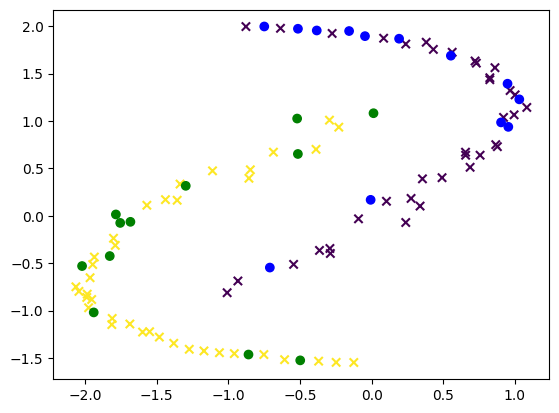

In [6]:
# Visualize both the Training and the Test set
plt.scatter(yy.train_explanatory.iloc[:, 0], yy.train_explanatory.iloc[:, 1], c = yy.train_explained, marker="x")

# Create a new column with custom colors: Green for class "1"; Blue for class "-1" 
pred_vs_actual_df['CLass-Color'] = pred_vs_actual_df['ClassPredicted'].apply(lambda x: 'Green' if x == 1 else 'Blue')

plt.scatter(
    pred_vs_actual_df.iloc[:, 0], 
    pred_vs_actual_df.iloc[:, 1], 
    c=pred_vs_actual_df["CLass-Color"], 
    marker="o")

plt.show()

To measure accuracy of this classifier

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_mtx_kNNr = confusion_matrix(yy.test_explained, predictions)
print("Confusion matrix: \n{}".format(confusion_mtx_kNNr))

# Get only the Accuracy; represent the report as a dictionary (output_dict=True)
ACC = classification_report(yy.test_explained, predictions, output_dict=True)['accuracy']
print("\n#####   Accuracy: {} %   ##### \n\n\n".format(ACC*100))

# Get all stats
print(classification_report(yy.test_explained, predictions, output_dict=False))

Confusion matrix: 
[[13  0]
 [ 0 12]]

#####   Accuracy: 100.0 %   ##### 



              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



## Logistics regression
- In the default case requires all dependent variables to be binary
    - Can be extended for multiclass classification using more than one separate refressors / One vs Rest (OvR) scheme
- Requires relatively large sample size
- Low variance but high bias
- Not flexible enough to capture complex non-linear relationships in the dataset
- Can be used for feature extraction

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

#Fit
logreg.fit(yy.train_explanatory, yy.train_explained)

#Predict
predictions_LR = logreg.predict(yy.test_explanatory)

print("All predictions: {0} \n\n\n".format(predictions_LR))
pred_vs_actual_LR_df = yy.test_explanatory.copy()
pred_vs_actual_LR_df["ClassPredicted"] = predictions_LR
pred_vs_actual_LR_df["ClassActual"] = yy.test_explained
print(pred_vs_actual_LR_df)

All predictions: [-1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
  1] 



           X         Y  ClassPredicted  ClassActual
75 -0.519397  1.025735              -1            1
76 -1.784225  0.013988               1            1
77 -1.754042 -0.075521               1            1
78 -1.682828 -0.063911               1            1
79 -1.938851 -1.019724               1            1
80 -0.858849 -1.464142               1            1
81  0.903586  0.985255              -1           -1
82  0.948722  1.393368              -1           -1
83 -0.514222  0.652066              -1            1
84  0.013431  1.082022              -1            1
85 -0.006578  0.168108              -1           -1
86 -0.513769  1.973225              -1           -1
87 -1.827018 -0.425058               1            1
88 -0.709897 -0.546549               1           -1
89 -0.382578  1.955077              -1           -1
90  0.553294  1.689048              -1           -1
91  0.192063  1.8

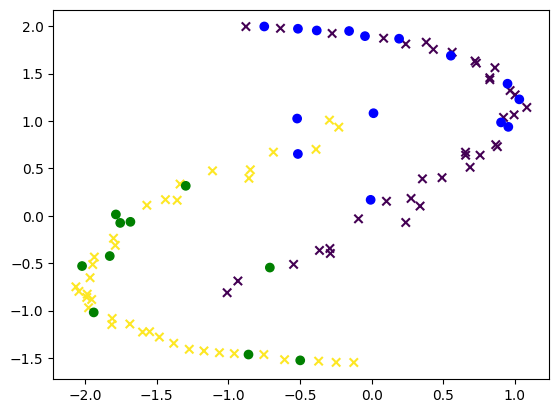

In [9]:
# Visualize both the Training and the Test set
plt.scatter(yy.train_explanatory.iloc[:, 0], yy.train_explanatory.iloc[:, 1], c = yy.train_explained, marker="x")

# Create a new column with custom colors: Green for class "1"; Blue for class "-1" 
pred_vs_actual_LR_df['CLass-Color'] = pred_vs_actual_LR_df['ClassPredicted'].apply(lambda x: 'Green' if x == 1 else 'Blue')

plt.scatter(
    pred_vs_actual_LR_df.iloc[:, 0], 
    pred_vs_actual_LR_df.iloc[:, 1], 
    c=pred_vs_actual_LR_df["CLass-Color"], 
    marker="o")

plt.show()

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_mtx_LR = confusion_matrix(yy.test_explained, predictions_LR)
print("Confusion matrix: \n{}".format(confusion_mtx_LR))

# Get only the Accuracy
ACC = classification_report(yy.test_explained, predictions_LR, output_dict=True)['accuracy']
print("\n#####   Accuracy: {} %   ##### \n\n\n".format(ACC*100))

# Get all stats
print(classification_report(yy.test_explained, predictions_LR, output_dict=False))

Confusion matrix: 
[[12  1]
 [ 3  9]]

#####   Accuracy: 84.0 %   ##### 



              precision    recall  f1-score   support

          -1       0.80      0.92      0.86        13
           1       0.90      0.75      0.82        12

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25



## Naive Bayes
- computationally fast: requires one pass on the entire dataset to calculate the posterior propabilities for each feature, very fast for classification/prediction
- NB works well with high dimensions
- Relies on independence assumption of the explanatory variable. The performance can be poor if the independence assumption is not

In [11]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()

#Fit
naive_bayes.fit(yy.train_explanatory, yy.train_explained)

#Predict
predictions_NB = naive_bayes.predict(yy.test_explanatory)

print("All predictions: {0} \n\n\n".format(predictions_NB))
pred_vs_actual_NB_df = yy.test_explanatory.copy()
pred_vs_actual_NB_df["ClassPredicted"] = predictions_NB
pred_vs_actual_NB_df["ClassActual"] = yy.test_explained
print(pred_vs_actual_NB_df)

All predictions: [-1  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
  1] 



           X         Y  ClassPredicted  ClassActual
75 -0.519397  1.025735              -1            1
76 -1.784225  0.013988               1            1
77 -1.754042 -0.075521               1            1
78 -1.682828 -0.063911               1            1
79 -1.938851 -1.019724               1            1
80 -0.858849 -1.464142               1            1
81  0.903586  0.985255              -1           -1
82  0.948722  1.393368              -1           -1
83 -0.514222  0.652066              -1            1
84  0.013431  1.082022              -1            1
85 -0.006578  0.168108              -1           -1
86 -0.513769  1.973225              -1           -1
87 -1.827018 -0.425058               1            1
88 -0.709897 -0.546549               1           -1
89 -0.382578  1.955077              -1           -1
90  0.553294  1.689048              -1           -1
91  0.192063  1.8

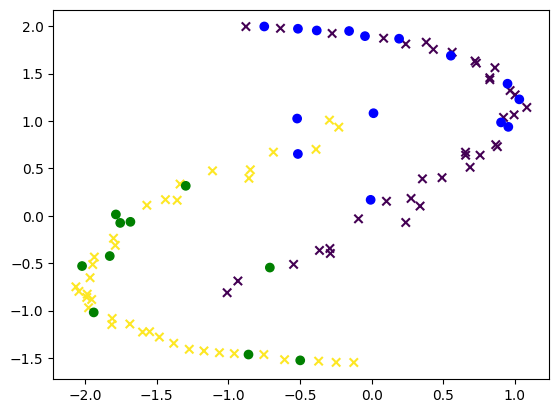

In [12]:
# Visualize both the Training and the Test set
plt.scatter(yy.train_explanatory.iloc[:, 0], 
            yy.train_explanatory.iloc[:, 1], 
            c = yy.train_explained, marker="x")

# Create a new column with custom colors: Green for class "1"; Blue for class "-1" 
pred_vs_actual_NB_df['CLass-Color'] = pred_vs_actual_NB_df['ClassPredicted'].apply(lambda x: 'Green' if x == 1 else 'Blue')

plt.scatter(
    pred_vs_actual_NB_df.iloc[:, 0], 
    pred_vs_actual_NB_df.iloc[:, 1], 
    c=pred_vs_actual_NB_df["CLass-Color"], 
    marker="o")

plt.show()

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_mtx_NB = confusion_matrix(yy.test_explained, predictions_NB)
print("Confusion matrix: \n{}".format(confusion_mtx_NB))

# Get only the Accuracy
ACC = classification_report(yy.test_explained, predictions_NB, output_dict=True)['accuracy']
print("\n#####   Accuracy: {} %   ##### \n\n\n".format(ACC*100))

# Get all stats
print(classification_report(yy.test_explained, predictions_NB, output_dict=False))

Confusion matrix: 
[[12  1]
 [ 3  9]]

#####   Accuracy: 84.0 %   ##### 



              precision    recall  f1-score   support

          -1       0.80      0.92      0.86        13
           1       0.90      0.75      0.82        12

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25



# 2. Decision Tree classifiers
- Decision tree
- Random Forest

## Decision tree
- Easy to understand non parametric with no prior assumption
- Very fast to predict/classify
- Able to automaticaly select important features in data
- Tends to overfit(analyze "too much information")
- Posibility of duplication with the same sub-tree on different paths

In [14]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier()

#fit
dtree.fit(yy.train_explanatory, yy.train_explained)

#predict
predictions_DT = dtree.predict(yy.test_explanatory)


print("All predictions: {0} \n\n\n".format(predictions_DT))
pred_vs_actual_DT_df = yy.test_explanatory.copy()
pred_vs_actual_DT_df["ClassPredicted"] = predictions_DT
pred_vs_actual_DT_df["ClassActual"] = yy.test_explained
print(pred_vs_actual_DT_df)




All predictions: [ 1  1  1  1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
  1] 



           X         Y  ClassPredicted  ClassActual
75 -0.519397  1.025735               1            1
76 -1.784225  0.013988               1            1
77 -1.754042 -0.075521               1            1
78 -1.682828 -0.063911               1            1
79 -1.938851 -1.019724               1            1
80 -0.858849 -1.464142               1            1
81  0.903586  0.985255              -1           -1
82  0.948722  1.393368              -1           -1
83 -0.514222  0.652066               1            1
84  0.013431  1.082022              -1            1
85 -0.006578  0.168108              -1           -1
86 -0.513769  1.973225              -1           -1
87 -1.827018 -0.425058               1            1
88 -0.709897 -0.546549              -1           -1
89 -0.382578  1.955077              -1           -1
90  0.553294  1.689048              -1           -1
91  0.192063  1.8

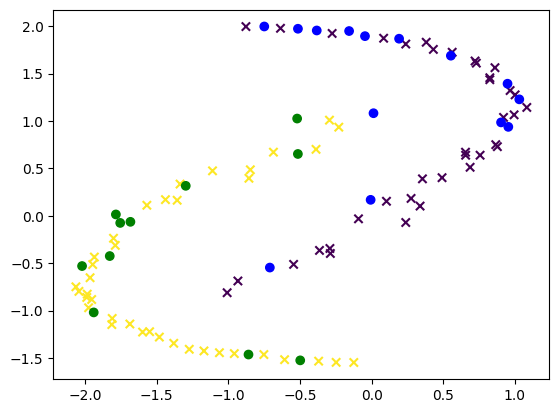

In [15]:
# Visualize both the Training and the Test set
plt.scatter(yy.train_explanatory.iloc[:, 0], 
            yy.train_explanatory.iloc[:, 1], 
            c = yy.train_explained, marker="x")

# Create a new column with custom colors: Green for class "1"; Blue for class "-1" 
pred_vs_actual_DT_df['CLass-Color'] = pred_vs_actual_DT_df['ClassPredicted'].apply(lambda x: 'Green' if x == 1 else 'Blue')

plt.scatter(
    pred_vs_actual_DT_df.iloc[:, 0], 
    pred_vs_actual_DT_df.iloc[:, 1], 
    c=pred_vs_actual_DT_df["CLass-Color"], 
    marker="o")

plt.show()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_mtx_DT = confusion_matrix(yy.test_explained, predictions_DT)
print("Confusion matrix: \n{}".format(confusion_mtx_DT))

# Get only the Accuracy
ACC = classification_report(yy.test_explained, predictions_DT, output_dict=True)['accuracy']
print("\n#####   Accuracy: {} %   ##### \n\n\n".format(ACC*100))

# Get all stats
print(classification_report(yy.test_explained, predictions_DT, output_dict=False))

Confusion matrix: 
[[13  0]
 [ 1 11]]

#####   Accuracy: 96.0 %   ##### 



              precision    recall  f1-score   support

          -1       0.93      1.00      0.96        13
           1       1.00      0.92      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



## Random forest
- More accurate than Decission Tree because is based on large number of Decision trees; average of all the outputs, which reduce bias and overfitting
- Less variance compared to a single decision tree
- Slow: all trees have to make their own predictions
- Difficult to interpret compared to single decision tree

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)

#fit
rf.fit(yy.train_explanatory, yy.train_explained)

#predict
predictions_RF = rf.predict(yy.test_explanatory)


print("All predictions: {0} \n\n\n".format(predictions_RF))
pred_vs_actual_RF_df = yy.test_explanatory.copy()
pred_vs_actual_RF_df["ClassPredicted"] = predictions_RF
pred_vs_actual_RF_df["ClassActual"] = yy.test_explained
print(pred_vs_actual_RF_df)

All predictions: [-1  1  1  1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
  1] 



           X         Y  ClassPredicted  ClassActual
75 -0.519397  1.025735              -1            1
76 -1.784225  0.013988               1            1
77 -1.754042 -0.075521               1            1
78 -1.682828 -0.063911               1            1
79 -1.938851 -1.019724               1            1
80 -0.858849 -1.464142               1            1
81  0.903586  0.985255              -1           -1
82  0.948722  1.393368              -1           -1
83 -0.514222  0.652066               1            1
84  0.013431  1.082022              -1            1
85 -0.006578  0.168108              -1           -1
86 -0.513769  1.973225              -1           -1
87 -1.827018 -0.425058               1            1
88 -0.709897 -0.546549              -1           -1
89 -0.382578  1.955077              -1           -1
90  0.553294  1.689048              -1           -1
91  0.192063  1.8

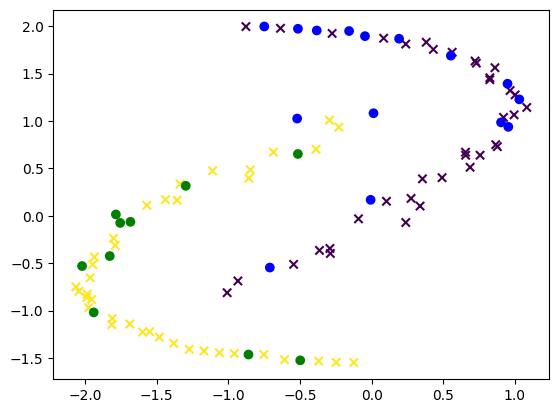

In [18]:
# Visualize both the Training and the Test set
plt.scatter(yy.train_explanatory.iloc[:, 0], 
            yy.train_explanatory.iloc[:, 1], 
            c = yy.train_explained, marker="x")

# Create a new column with custom colors: Green for class "1"; Blue for class "-1" 
pred_vs_actual_RF_df['CLass-Color'] = pred_vs_actual_RF_df['ClassPredicted'].apply(lambda x: 'Green' if x == 1 else 'Blue')

plt.scatter(
    pred_vs_actual_RF_df.iloc[:, 0], 
    pred_vs_actual_RF_df.iloc[:, 1], 
    c=pred_vs_actual_RF_df["CLass-Color"], 
    marker="o")

plt.show()


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_mtx_RF = confusion_matrix(yy.test_explained, predictions_RF)
print("Confusion matrix: \n{}".format(confusion_mtx_RF))

# Get only the Accuracy
ACC = classification_report(yy.test_explained, predictions_RF, output_dict=True)['accuracy']
print("\n#####   Accuracy: {} %   ##### \n\n\n".format(ACC*100))

# Get all stats
print(classification_report(yy.test_explained, predictions_RF, output_dict=False))

Confusion matrix: 
[[13  0]
 [ 2 10]]

#####   Accuracy: 92.0 %   ##### 



              precision    recall  f1-score   support

          -1       0.87      1.00      0.93        13
           1       1.00      0.83      0.91        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25



# 3. Application of the classifiers
- Artificial data
- Real data

## Application of the classifiers: Artificially generated data
* Generate artificial sample data with no complex relationships
* Compare the accuracy of the different classifiers


         x1        x2
0  0.380961  0.976788
1  0.982679  0.264426
2  0.080402 -1.011134
3 -0.522507 -0.351982
4  0.633521 -0.235833
Classes: [-1 -1 -1  1  1] ... 



Threshold: 150
Shape EXPLANATORY (Training set): (150, 2)
Shape EXPLAINED (Training set): (150,)
Shape EXPLANATORY (Test set): (100, 2)
Shape EXPLAINED (Test set): (100,)
Consistent dimensions


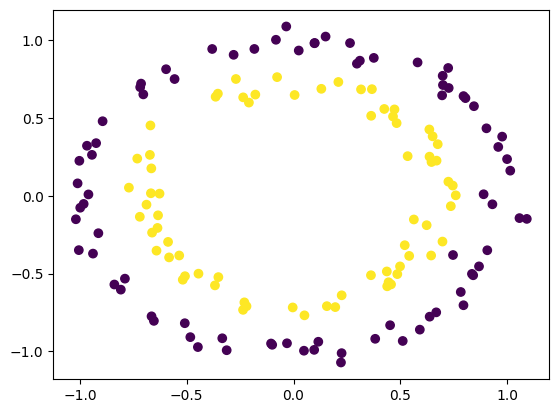

In [20]:
from sklearn import datasets

n=250
thr=150

circles = datasets.make_circles(n_samples=n, shuffle=True, noise=0.05, random_state=None, factor=0.7)
# Replace "0"s by "-1"
circles_target = [-1 if x==0 else 1 for x in circles[1]]
circles_target = np.array(circles_target)

x1_train = circles[0][:,0][0:thr]
x2_train = circles[0][:,1][0:thr]
target_train = circles_target[0:thr]

x1_test = circles[0][:,0][thr:n]
x2_test = circles[0][:,1][thr:n]
target_test = circles_target[thr:n]

trainDf = pd.DataFrame({"x1": x1_train, "x2": x2_train})
testDf = pd.DataFrame({"x1": x1_test, "x2": x2_test})

print(trainDf.head())
print("Classes: {} ... \n\n\n".format(circles_target[0:5]))

crc = Data(trainDf, target_train, testDf, target_test)

print("Threshold: " + str(thr))
crc.consistency_check()

plt.scatter(crc.train_explanatory.iloc[:, 1], crc.train_explanatory.iloc[:, 0], c = crc.train_explained)
plt.show()

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

def run_classifiers(data, classifiers):

    results = pd.DataFrame(columns = ["Classifier", "Accuracy"])

    for cl in classifiers:
        train_explanatory = data.train_explanatory
        test_explanatory = data.test_explanatory

        cl.fit(data.train_explanatory, data.train_explained)
        predictions = cl.predict(test_explanatory)

        confusionMtx = confusion_matrix(data.test_explained, predictions)

        ACC = classification_report(data.test_explained, predictions, output_dict=True)['accuracy']
        ACC *= 100

        clName = str(type(cl)).split(".")[-1].replace(">", "").replace("'", "")
        new_row = pd.DataFrame({"Classifier": [clName], "Accuracy": [ACC]})
        results = pd.concat([results, new_row], ignore_index=True)

    results = results.sort_values(by=['Accuracy'], ascending=False)
    
    return results   


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

cl_list = [KNeighborsClassifier(n_neighbors=1), 
           LogisticRegression(), 
           GaussianNB(), 
           tree.DecisionTreeClassifier(), 
           RandomForestClassifier(n_estimators=50)]

results = run_classifiers(data = crc, classifiers = cl_list)
print(results)

               Classifier  Accuracy
0    KNeighborsClassifier     100.0
4  RandomForestClassifier      92.0
3  DecisionTreeClassifier      90.0
2              GaussianNB      80.0
1      LogisticRegression      45.0


C:\Users\krist\AppData\Local\Temp\ipykernel_20428\3131518173.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)
D:\Python venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Python venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

## Real world data
* Generate artificial sample data with no complex relationships
* Compare the accuracy of the different classifiers

#### Iris dataset

In [33]:
import math

iris_df = pd.read_csv(path + "iris.csv")
iris_df = iris_df.sample(frac=1).reset_index(drop=True)

n = iris_df.shape[0]
thr = math.floor(0.7*n)

# Training subset
X = iris_df.iloc[0:thr:, :-1]  # Explanatory variables
Y = iris_df.iloc[0:thr:, -1]   # Target variable 

# Testing subset
X_test = iris_df.iloc[thr:n:, :-1]  # Explanatory variables
Y_test = iris_df.iloc[thr:n:, -1]   # Target variable


print(iris_df.head())
print("\n Classes: \n {} ... \n\n\n".format(Y[0:5]))


iris = Data(X, Y, X_test, Y_test)


print("Threshold: " + str(thr))
iris.consistency_check() 

   sepal.length  sepal.width  petal.length  petal.width     variety
0           5.0          3.5           1.3          0.3      Setosa
1           5.0          3.3           1.4          0.2      Setosa
2           6.0          2.2           5.0          1.5   Virginica
3           6.4          3.2           4.5          1.5  Versicolor
4           5.6          2.8           4.9          2.0   Virginica

 Classes: 
 0        Setosa
1        Setosa
2     Virginica
3    Versicolor
4     Virginica
Name: variety, dtype: object ... 



Threshold: 105
Shape EXPLANATORY (Training set): (105, 4)
Shape EXPLAINED (Training set): (105,)
Shape EXPLANATORY (Test set): (45, 4)
Shape EXPLAINED (Test set): (45,)
Consistent dimensions


In [34]:
cl_list = [KNeighborsClassifier(n_neighbors=1), 
           LogisticRegression(max_iter=2500), 
           GaussianNB(), 
           tree.DecisionTreeClassifier(), 
           RandomForestClassifier(n_estimators=50)]

results = run_classifiers(data = iris, classifiers = cl_list)
print(results)

               Classifier    Accuracy
1      LogisticRegression  100.000000
3  DecisionTreeClassifier  100.000000
2              GaussianNB  100.000000
4  RandomForestClassifier  100.000000
0    KNeighborsClassifier   97.777778


C:\Users\krist\AppData\Local\Temp\ipykernel_20428\3131518173.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


There is an example with some redwine dataset but im not writing all of that